In [1]:
%matplotlib inline

import numpy as np
import numpy.random as npr
import tabulate as tb
import math
import matplotlib.pyplot as plt
from tqdm import tqdm

from rlbase.environment import GridworldEx41Environment, CarRentalEnvironment, GamblerEnvironment
from rlbase.policy import UniformPolicy, DeterministicPolicy
from rlbase.policy_functions import *

# Figure 4.1

In [2]:
env = GridworldEx41Environment()

pi = UniformPolicy(env=env)

v, arr_v = evaluate_policy_iterative(env,pi)

for (i,x) in enumerate(arr_v):
  if i in [1,2,3,10,425]:
    print("Iteration: ",i)
    env.pretty_print(env.reshape(x))

Iteration:  1
--  --  --  --
 0  -1  -1  -1
-1  -1  -1  -1
-1  -1  -1  -1
-1  -1  -1   0
--  --  --  --

Iteration:  2
----  ----  ----  ----
 0    -1.8  -2    -2
-1.8  -2    -2    -2
-2    -2    -2    -1.8
-2    -2    -1.8   0
----  ----  ----  ----

Iteration:  3
----  ----  ----  ----
 0    -2.4  -2.9  -3
-2.4  -2.9  -3    -2.9
-2.9  -3    -2.9  -2.4
-3    -2.9  -2.4   0
----  ----  ----  ----

Iteration:  10
----  ----  ----  ----
 0    -6.1  -8.4  -9
-6.1  -7.7  -8.4  -8.4
-8.4  -8.4  -7.7  -6.1
-9    -8.4  -6.1   0
----  ----  ----  ----

Iteration:  425
---  ---  ---  ---
  0  -14  -20  -22
-14  -18  -20  -20
-20  -20  -18  -14
-22  -20  -14    0
---  ---  ---  ---



# Exercise 4.1
Calculate the q-values for (s,a)=((3,1),"down") and (s,a)=((3,2),"down")

In [3]:
q = get_action_value_function(env,arr_v[-1])
print('q((3,1),"down")',round(q((3,1),"down"),1))
print('q((3,2),"down")',round(q((3,2),"down"),1))

q((3,1),"down") -1.0
q((3,2),"down") -15.0


In [4]:
improved_policy = improve_policy_from_value_function(env,v)
env.plot_bestaction_policy(improved_policy)
v = evaluate_policy_linear_system(env,improved_policy)
env.pretty_print(env.reshape(v))

improved_policy = improve_policy_from_value_function(env,v)
env.plot_bestaction_policy(improved_policy)
v = evaluate_policy_linear_system(env,improved_policy)
env.pretty_print(env.reshape(v))


----  --  --  ----
uldr  l   l   ld
u     ul  ld  d
u     ur  dr  d
ur    r   r   uldr
----  --  --  ----
--  --  --  --
 0  -1  -2  -3
-1  -2  -3  -2
-2  -3  -2  -1
-3  -2  -1   0
--  --  --  --

----  ----  ----  ----
uldr  l     l     ld
u     ul    uldr  d
u     uldr  dr    d
ur    r     r     uldr
----  ----  ----  ----
--  --  --  --
 0  -1  -2  -3
-1  -2  -3  -2
-2  -3  -2  -1
-3  -2  -1   0
--  --  --  --



# Example 4.2

Jack's Car Rental

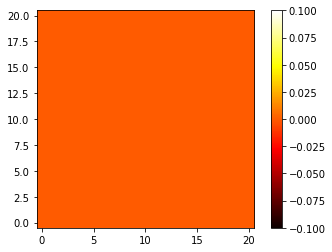

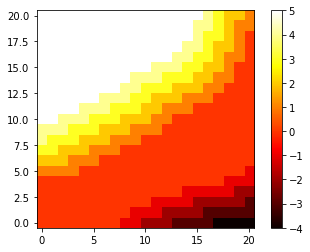

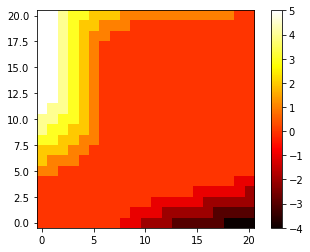

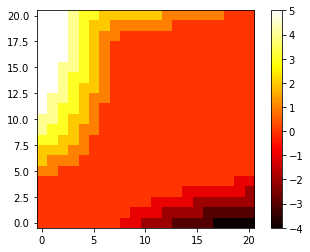

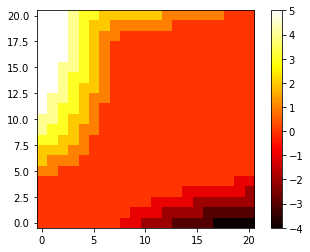

In [ ]:
gamma = 0.9
env = CarRentalEnvironment()
pi = DeterministicPolicy(env=env,best_actions={s:[0] for s in env.states})

for i in range(5):
    arr = np.zeros((env.nmax+1,env.nmax+1))
    for i in range(env.nmax+1):
      for j in range(env.nmax+1):
        arr[i,j] = pi.get((i,j))
    plt.imshow(arr, cmap='hot', interpolation='nearest',origin="lower")
    plt.colorbar()
    plt.show()
    v = evaluate_policy_linear_system_two_args(env,pi,gamma=gamma)
    pi = improve_policy_from_value_function_two_args(env, v, gamma)

# Example 4.3 Gambler's Problem

In [ ]:
N = 100

env = GamblerEnvironment(n=N)

# Evaluate policy and visualize value function
v, arr_v = value_iteration_two_args(env,tol=1e-4)
for i in arr_v:
  plt.plot([i[j] for j in range(1,N)])

plt.figure()
arr = np.zeros((N+1,N+1))
for s in range(1,N):
  for a in env.actions:
    v1 = 0
    for (s_prime, r, p) in env.state_transition_two_args(s,a):
      v1 += p * (r + v[s_prime])
    arr[s,a] = v1
plt.imshow(arr[1:99,:])

pi = improve_policy_from_value_function_two_args(env,v,tol=1e-3)

plt.figure()
aa = []
ss = []
for s in range(1,N):
  for a in range(1,N):
    if pi.prob(a,s)>0:
      aa.append(a)
      ss.append(s)
      break
plt.plot(ss,aa,'x')